In [1]:
library("ggtree")
library("tidyverse")
library("ape")
library("phytools")
library("treeio")

ggtree v3.9.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194

Guangchuang Yu. Using ggtree to visualize data on tree-like structures.
Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble  

In [13]:

##Read in phylogenetic tree, transfer 
anc_tree <- read.tree('LGF_10_anc_tree.txt.treefile.txt')
tree <- read.tree('LGF_10_anc_tree_branch_length.txt.treefile.txt')
anc_true_tree <- read.tree('LGF_10_anc_tree_branch_length.txt.treefile.txt')
anc_tree$edge.length <- anc_true_tree$edge.length

##Read in phenotype data, slicing only the extant sequences
mapping_df <- read.csv('Mapping_df.csv')
mapping_df$X <- NULL
mapping_df <- mapping_df[1:581, ]

enrichment <- mapping_df$Log_enrichment

##Calculate expected ancestral states using a brownian motion model fitted by residual maximum likelihood
fitBM <- ace(enrichment, anc_tree, model = "BM", type = "continuous")

fitBM_df <- data.frame(fitBM$ace)
enrichment <- c(mapping_df$Log_enrichment, fitBM_df$fitBM.ace)
x <- as_tibble(anc_tree)
dat<-read.csv('Mapping_df.csv')
dat$Expected_log_enrichment <- enrichment
dat$X<-NULL
dat$lib_id
labels <- c(anc_tree$tip.label, anc_tree$node.label)
dat$labels <- labels

anc_tree_expect <- full_join(x, dat, by = 'node')%>% as.treedata



Warning message in sqrt(1/out$hessian):
“NaNs produced”


[1]  920  927  942  634  778  777  836 1018  636  964  973  971  974  975
  [15]  965  978  966  967  970  972  968  976  969  981  977  979  980  922
  [29]  744  921  963  960  962  961  937  940  939  811  946  720  858  938
  [43] 1043 1045  621  622  623  751  699 1019 1022 1020 1021 1023 1026 1017
  [57] 1025 1042  791  945 1028  781 1024 1044 1052 1051 1057 1055 1054 1039
  [71] 1040 1041 1027 1035 1031 1036 1032 1033 1037 1038 1030 1029 1056  941
  [85]  943 1152 1053  959 1034  982  983  985  984  986  994  992  993  995
  [99]  996  990  989  991  987  988 1150  594  600  605  598  603  601  602
 [113]  595  610  608  599  604  596  606  612  607  609  611  613  614  732
 [127]  615  618  619  620 1126 1130 1131 1127 1128 1129 1100 1103 1101 1104
 [141] 1106 1102 1105 1108 1107 1109 1119 1120 1122 1121 1123 1110 1118 1115
 [155] 1116 1111 1114 1113 1112 1117 1124 1125  957 1046 1047 1049 1048 1050
 [169] 1084 1096 1058 1069 1079 1078 1071 1072 1081 1073 1076 1077 1063 1068
 [183] 1059 1066 1067 1064 1065 1075 1089 1090 1091 1082 1092 1095 1085 1094
 [197] 1093 1060 1061 1062 1097 1074 1087 1088 1083 1080 1098 1099 1070 1010
 [211] 1014 1011 1015 1016 1012 1013 1154 1153 1155 1156 1157 1158 1132 1135
 [225] 1136 1133 1134 1137 1139 1138 1140 1143 1141 1148 1149 1145 1146 1147
 [239] 1144 1142  597  733  906 1086 1151  953  944  948  952  947  949  951
 [253]  950  954  955  958  586  587  590  591  589  588  592  956  581  584
 [267]  585  583  593  582  580  579  616  617  775  776  824  742  754  758
 [281]  757  762  761  756  759  768  769  755  763  764  765  767  766  760
 [295]  772  740  743  747  925  930  926  929  928  752  770  700  718  773
 [309]  774  719  730  748  745  652  913  912  916  914  917  915  918  678
 [323]  771  821  809  813  822  790  793  794  802  803  792  815  820  800
 [337]  801  810  804  808  795  796  805  799  806  807  780  783  785  786
 [351]  788  787  784  789  859  861  862  863  860  782  646  661  660  662
 [365]  663  670  671  668  669  651  817  891  908  655  705  674  704  750
 [379]  818  656  888  827  870  909  741  864  865  883  884  885  878  868
 [393]  871  873  879  877  881  880  869  876  882  887  886  872  874  875
 [407]  894  910  911  889  893  896  895  890  898  897  899  900  901  902
 [421]  903  904  866  867  907  672  823  654  679  826  829  830  832  831
 [435]  833  828  850  851  855  852  854  853  659  673  677  684  680  857
 [449]  681  682  649  722  694  650  665  667  666  723  714  724  725  726
 [463]  727  721  683  713  728  664  856  749  797  653  657  658  675  923
 [477]  729  905  819  676  779  812  825  731  847  848  845  841  849  843
 [491]  846  844  746  834  835  837  838  842  839  840  648  701  689  814
 [505]  685  695  696  697  690  707  710  711  708  709  691  692  693  712
 [519]  816  716  717  734  647  702  703  736  738  686  737  687  698  735
 [533]  688  919  739 1004 1005 1007 1006 1008 1009  638  892  706  798  715
 [547]  753  624  626  627  628  629  578  630  625  632  639  640  641  642
 [561]  643  631  633 1003  998 1000  999 1001 1002  644  645  924  635  637
 [575]  997  931  934  935  936  932  933    0   51   51   52   53   54   55
 [589]   56   57   58   59    1    2    3    4    5    6    7    8    9   15
 [603]   89   18   18   19   66   61   62   63   64   65   66   67   68   69
 [617]   70   72   72   73   74   75   76   78   78   79   80   81   82   83
 [631]   84   85   86   87   88   89   90   91   92   93   94   95   20   21
 [645]   22   23   96   97   98   99  100  101  102   24  103  104  105  106
 [659]  107  108  109  110  111  112  113  114  118  118  117  118  119  120
 [673]  121  122  123   25   26  207  207  125  125  125  125  126  128  128
 [687]  129  130  131  132  133  134  135  136  137  138  125   32   33   34
 [701]  139  140  141  142  143  144  147  146  147  148  149  150  151  152
 [715]  153  154  155  156  157  158  159  160  161  162  164  164  166  166

Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This c

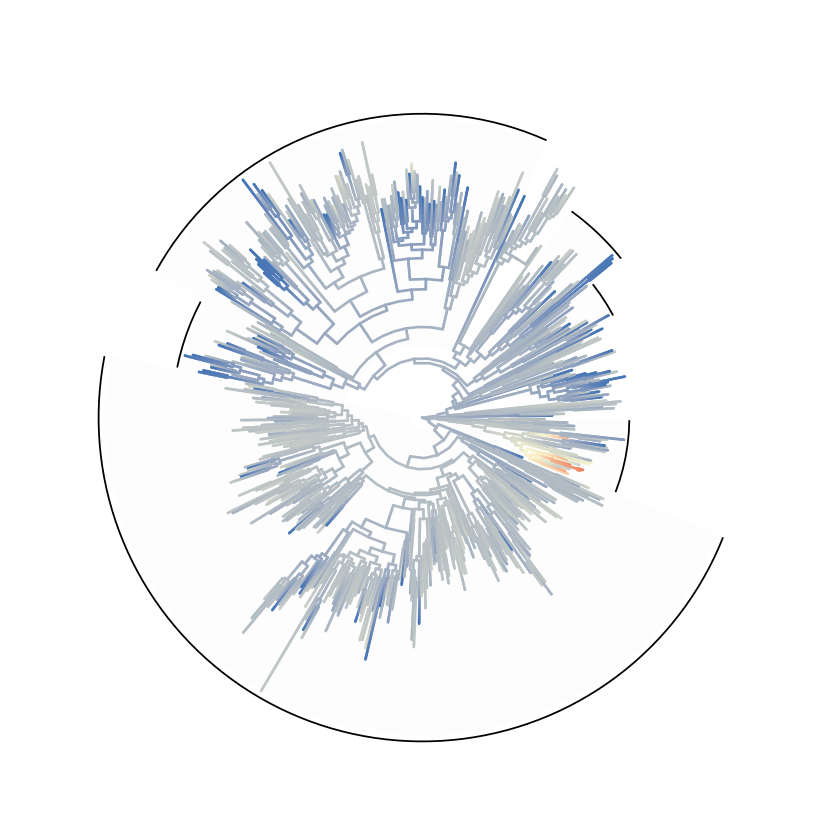

In [14]:
##Plot phylogeny with expected trait unders BM model
p1 <- ggtree(anc_tree_expect, layout='circular', ladderize = FALSE, size=0) +

geom_hilight(node=MRCA(tree,'A0A251VVB8_129_Litor', 'C6DD30_1_Pectobacter'), fill= 'grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree,'A0A1H1LAX5_38_Friedm', 'K9ZXM6_97_Deinococcu'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'A0A1W1UHL0_79_Deinoc', 'Q2B3S3_59_Bacillus'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'A0A0P6XSZ0_122_Therm', 'A0A1V3IX86_57_Rodent'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'F6B8R2_58_Desulfotom', 'A0A0C7P0X1_100_Deflu'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'A0A0A1Q197_55_bacter', 'A0A1X0WDM9_11_Rouxie'), fill='grey95', alpha = 0.15)+
geom_cladelabel(node=MRCA(tree,'A0A251VVB8_129_Litor', 'C6DD30_1_Pectobacter'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree,'A0A1H1LAX5_38_Friedm', 'K9ZXM6_97_Deinococcu'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'A0A1W1UHL0_79_Deinoc', 'Q2B3S3_59_Bacillus'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'A0A0P6XSZ0_122_Therm', 'A0A1V3IX86_57_Rodent'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'F6B8R2_58_Desulfotom', 'A0A0C7P0X1_100_Deflu'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'A0A0A1Q197_55_bacter', 'A0A1X0WDM9_11_Rouxie'), label = '', color = 'black', fontsize = 0)+


    geom_tree(aes(color=Expected_log_enrichment), continuous = 'colour',size=0.75) +  
    scale_color_gradient2(low='#4575b4',
                          mid='#F7F5CD',
                          high='#d73027',
                         midpoint=-1)+
theme(legend.position = 'none')
p1
ggsave('Expected_log_enrichment_phylo.pdf',plot=p1)

Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: node,
parent
ℹ This c

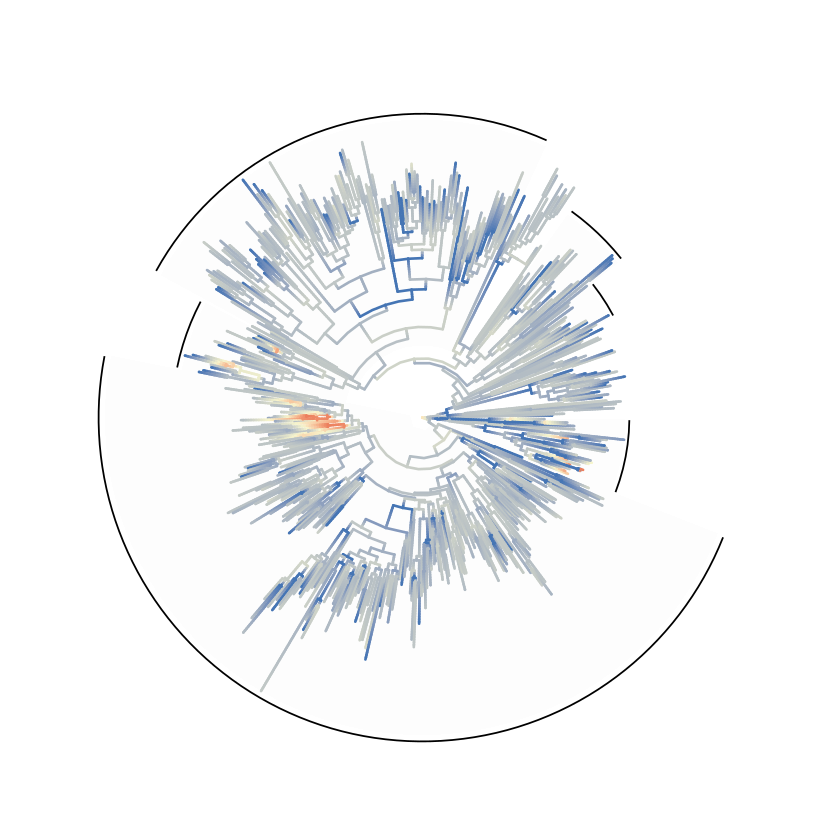

In [15]:
##Plot phylogeny with empirical traits, using the same scale as above

p1 <- ggtree(anc_tree_expect, layout='circular', ladderize = FALSE, size=0) +

geom_hilight(node=MRCA(tree,'A0A251VVB8_129_Litor', 'C6DD30_1_Pectobacter'), fill= 'grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree,'A0A1H1LAX5_38_Friedm', 'K9ZXM6_97_Deinococcu'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'A0A1W1UHL0_79_Deinoc', 'Q2B3S3_59_Bacillus'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'A0A0P6XSZ0_122_Therm', 'A0A1V3IX86_57_Rodent'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'F6B8R2_58_Desulfotom', 'A0A0C7P0X1_100_Deflu'), fill='grey95', alpha = 0.15)+
geom_hilight(node=MRCA(tree, 'A0A0A1Q197_55_bacter', 'A0A1X0WDM9_11_Rouxie'), fill='grey95', alpha = 0.15)+
geom_cladelabel(node=MRCA(tree,'A0A251VVB8_129_Litor', 'C6DD30_1_Pectobacter'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree,'A0A1H1LAX5_38_Friedm', 'K9ZXM6_97_Deinococcu'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'A0A1W1UHL0_79_Deinoc', 'Q2B3S3_59_Bacillus'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'A0A0P6XSZ0_122_Therm', 'A0A1V3IX86_57_Rodent'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'F6B8R2_58_Desulfotom', 'A0A0C7P0X1_100_Deflu'), label = '', color = 'black', fontsize = 0)+
geom_cladelabel(node=MRCA(tree, 'A0A0A1Q197_55_bacter', 'A0A1X0WDM9_11_Rouxie'), label = '', color = 'black', fontsize = 0)+


    geom_tree(aes(color=Log_enrichment), continuous = 'colour',size=0.75) +  
    scale_color_gradient2(low='#4575b4',
                          mid='#F7F5CD',
                          high='#d73027',
                         midpoint=-1)+
theme(legend.position = 'none')
p1
ggsave('Empirical_log_enrichment_phylo.pdf',plot=p1)